# Mall Customers Clustering
## 변수 설명
- CustomerID: 고객 고유 번호
- Gender: 성별
- Age: 나이
- Annual Income(k$): 고객의 연간 수입
- Spending Score(1-100): 고객의 소비 습관을 기반으로 매장에서 할당한 점수

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [211]:
# 결측치 확인
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [212]:
# 고유값 확인 후 인코딩
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [213]:
data.replace({'Male':0, 'Female':1}, inplace=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [214]:
# Customer ID는 인덱스이므로 분석에 사용하지 않는다.
feature = data.drop(['CustomerID'],axis=1)
feature.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [215]:
feature.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Group By Gender')

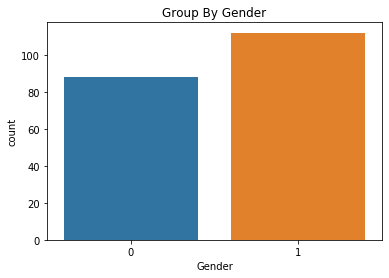

In [216]:
# 성별 간 데이터 분포 확인 (0: male, 1: female)
sns.countplot(x='Gender', data=feature)
plt.title('Group By Gender')

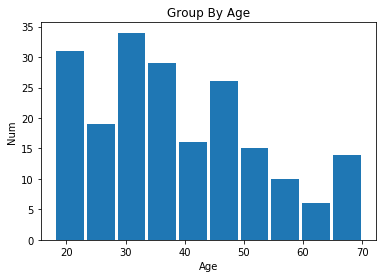

In [217]:
# 나이 별 데이터 분포 확인
plt.hist(feature['Age'], rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Num')
plt.title('Group By Age')
plt.show()

---

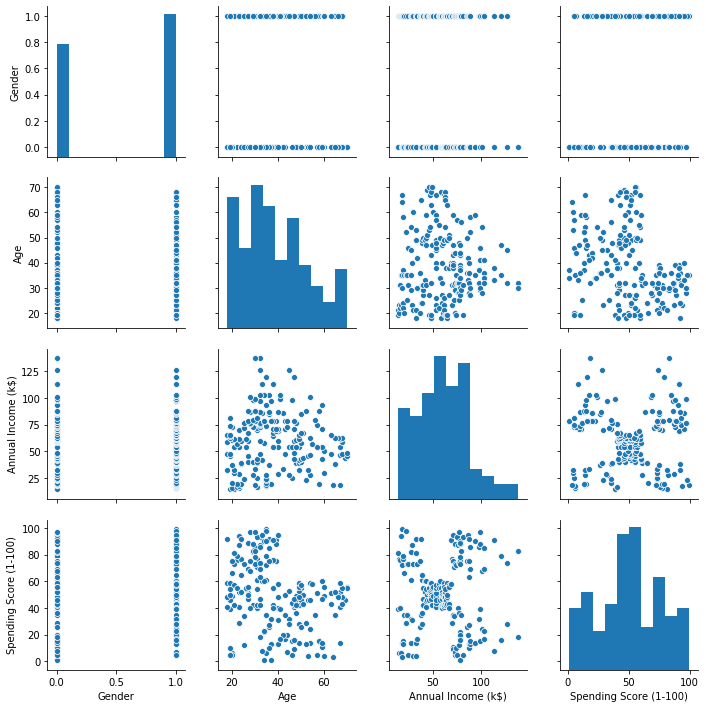

In [218]:
sns.pairplot(feature)
plt.show()

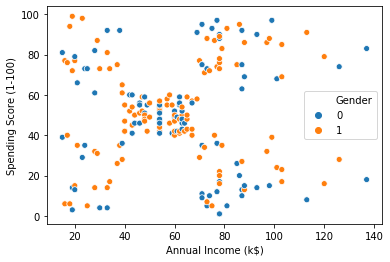

In [219]:
# Annual Income과 Spending Score 간 산점도
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=feature)
plt.show()

Annual Income과 Spending Score 간 산점도의 분포가 명확해 보인다. <br/>
(CustomerID는 단순 index이므로 제외) <br/>


5개 정도의 cluster가 눈에 띈다. 성별 분포는 적당한 것 같다.<br/>
1. 높은 score, 낮은 income
2. 낮은 score, 낮은 income
3. 적당한 score, 적당한 income
4. 낮은 score, 높은 income
5. 높은 score, 높은 income

---
## K-Means Clustering

In [220]:
from sklearn.cluster import KMeans

In [221]:
#K-Means 군집 분석 
## KMeans parameters
## algorithm: auto / full / elkan (default = auto)
## init: k-means++ / random / ndarray
    ## k-means++는 cluster 중심점을 멀리 설정하여 군집화를 용이하게 한다.
    ## (거리와 반비례하는 지표를 사용)

In [222]:
# 시각화 결과에 따라 Annual income과 Spending score를 중심으로 분석
# cluster는 5개로 군집화
X = feature.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values

model = KMeans(n_clusters=5, algorithm='auto')
model.fit(X)
predict = pd.DataFrame(model.predict(X))
predict.columns=['predict']


Text(0.5, 1.0, 'Elbow curve')

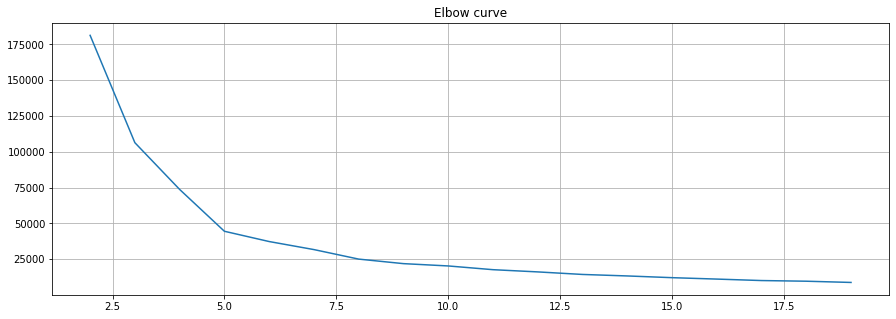

In [223]:
# 최적의 군집수 k 결정
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [224]:
silhouette_score(X, model.labels_)

0.553931997444648

In [225]:
# 아래 링크에서 효율적으로 실루엣 값을 비교하는 법을 참고하였습니다.
# https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters=',n_clusters, 'The average silhouette_score is:', silhouette_avg)

For n_clusters= 2 The average silhouette_score is: 0.2968969162503008
For n_clusters= 3 The average silhouette_score is: 0.46761358158775435
For n_clusters= 4 The average silhouette_score is: 0.4931963109249047
For n_clusters= 5 The average silhouette_score is: 0.553931997444648
For n_clusters= 6 The average silhouette_score is: 0.5376203956398481
For n_clusters= 7 The average silhouette_score is: 0.5270287298101395
For n_clusters= 8 The average silhouette_score is: 0.4572211842776841
For n_clusters= 9 The average silhouette_score is: 0.45872989167156364
For n_clusters= 10 The average silhouette_score is: 0.4467356774401869


> 여러 클러스터에 대한 실루엣 수치를 비교한 결과 **5개**의 군집이 최적으로 선정되었다.


> 보다 자세한 전략을 수립하고자 할 때 6개나 7개까지 클러스터를 나누어도 무방할 것이다.

---
## Hierarchical Agglomerative Clustering
- 계층적 군집화
- 개체들을 가까운 집단부터 차근차근 묶어나가는 방식
- 유사한 개체들이 결합되는 dendrogram 생성
- 사전에 군집의 개수를 정하지 않아도 된다.
- parameters
> [method(군집 간 거리 계산법)]: average / centroid / complete / median / single / ward / weighted <br/>
[metric(거리 측정법)]: euclidean(default) / sqaredeuclidean / seuclidean / ... <br/>



In [226]:
from scipy.cluster.hierarchy import linkage, dendrogram

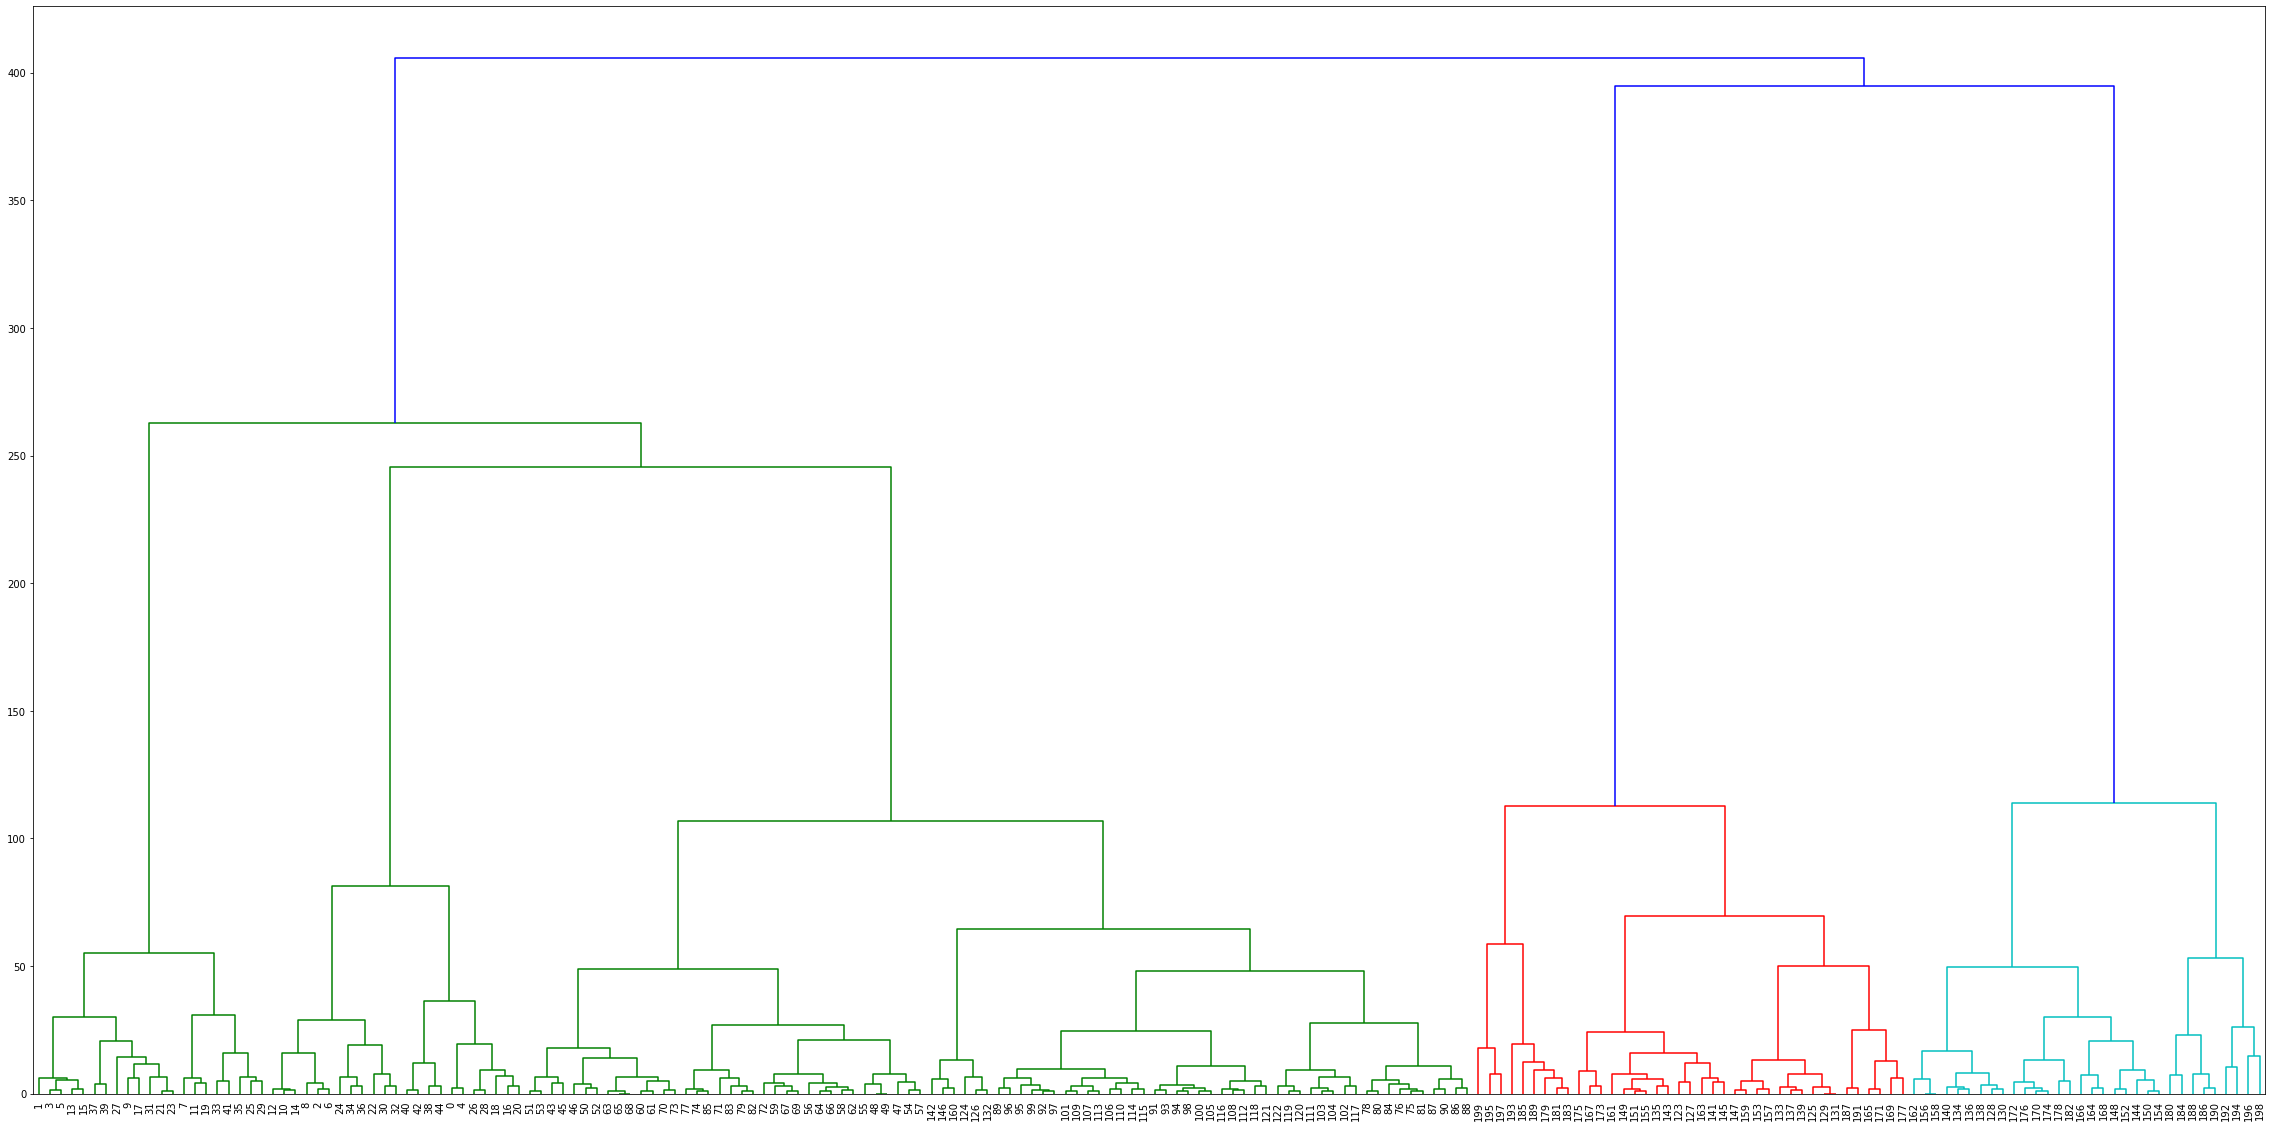

In [227]:
# ward로 군집-군집, or 군집-개체 간 거리 계산
links = linkage(X, method='ward')

# Plot the dendrogram: CustomerID를 leaf node로 사용
plt.figure(figsize=(40,20))
dendrogram(links,
          leaf_rotation=90,
          leaf_font_size=10
          )
plt.show()

> 크게 5개의 cluster로 나누고 싶어지는 그래프이다.

In [228]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

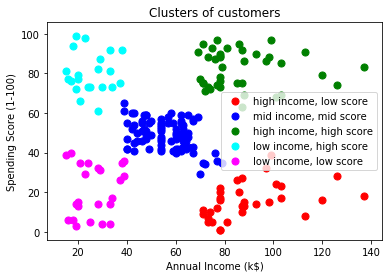

In [229]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'high income, low score')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'mid income, mid score')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'high income, high score')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'low income, high score')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'low income, low score')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

> 고객의 성향에 따른 전략을 수립하는 것이 분석의 핵심이 될 것이다.

In [230]:
silhouette_score(X, y_hc) # 5개의 군집화가 타당함을 보여준다.

0.5529945955148897